# MACHINE LEARNING ASSIGMENT 1
### ***Predictive model for determining the status of loan repayment***




## STUDENT DETAILS

***Group iD:***
23

***Group Name:***
Linear_Legends

***Student roll number & name:***

A055_Gwyneth_Pereira

A057_Tanishtha_Poddar

A058_Ritika_Pradhan


## ***Information on the Dataset***

The dataset used in this assignment can be downloaded and previewed


*   [status of loan repayment](https://docs.google.com/spreadsheets/d/10Mr596K5zxiwOTje1iGvdAF3dnPzy3aO/edit?usp=sharing&ouid=108081835396928440068&rtpof=true&sd=true)



### *Attribute Information*

*target variable:* loan_status (Categorical)

#### **Loan related attributes**

*loan_amt (float)* : Loan amount requested

*term     (string)* : Loan term ( *for example:* "36 months", "60 months")

*int_rate (float)* : Loan interest rate (%)

*installment (float)* : Monthly loan payment amount

*grade  (categorical)* : Loan grade assigned by lender

*sub_grade (categorical)* : Sub-grade

*initial_list_status (categorical)* : intital loan listing status

#### **Applicant-related attributes**

*emp_title (categorical)* : Job title of the borrower

*emp_length (categorical)* : Length of employment

*homeownership (categorical)* : Homeownership type (*for example*: "renter",
 "mortgage")

*annual_inc (float)*: Annual income of the borrower


#### **Credit History-related attributes**

*open_acc (integer)*: Number of open credit lines

*pub_rec (integer)* : Number of derogatory public records

*revol_bal (float)* : Revolving credit balance

*revol_util  (float)* : Credit utilization ratio(%)

*total_acc (integer)*: Total number of credit accounts






##***Case Study***

Financial institutions, such as banks and lending companies, face significant risks in their lending operations due to potential loan defaults.To avoid this, traditionally, lenders would assess creditworthiness using manual methods, such as credit scores and financial history reviews. However, these methods may not capture all risk factors effectively, in the sense that over reliance on credit scores may deem borrowers with no credit history as *unreliable* .

The dataset used comprises 255,347 entries and 18 columns, covering various aspects of borrower demographics, financial details, and loan-specific attributes


### *Machine learning problem and objectives*
The aim of this assignment is to develop and train a machine learning model to determine wheteher a borrower will default on their loan based on historical data and further more to help banks decide whether or not to adjust their loan terms based on the results concluded and essentially reduce the number of high risk loans and losses faced by the bank.

Thus the problem we face in this assingment is a ***binary classification problem***.

### Project structure

**1)** Exploratory data analysis

**2)** Data wrangling

**3)** Machine learning techniques

**4)** Conclusion








In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("loan_data_2.csv",encoding="ISO-8859-1")

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


#### *Basic information of the dataset*

In [ ]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
data["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Axes: xlabel='loan_status', ylabel='count'>

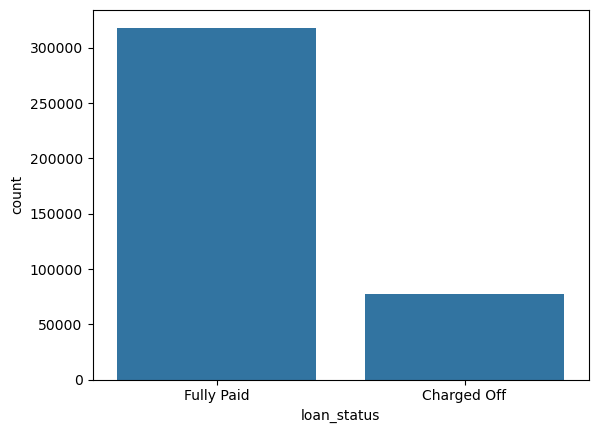

In [ ]:
sns.countplot(x="loan_status", data = data)

C:\Users\hp\AppData\Local\Temp\ipykernel_12588\901757907.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["loan_amnt"] , bins =20)


<Axes: xlabel='loan_amnt', ylabel='Density'>

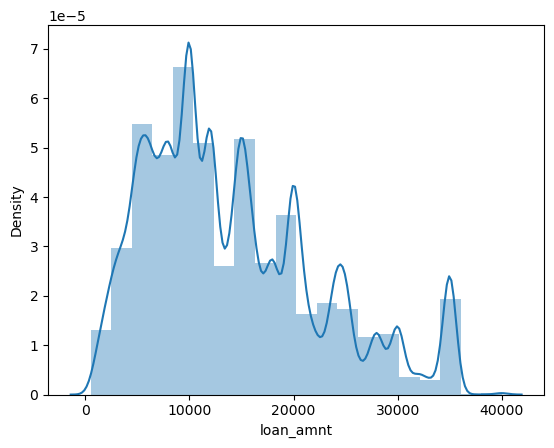

In [ ]:
sns.distplot(data["loan_amnt"] , bins =20)
# put kde as false to remove the line above this and
#bins = some number give number of bars to be allowed

# ***Exploratory Data Analysis***

<Axes: >

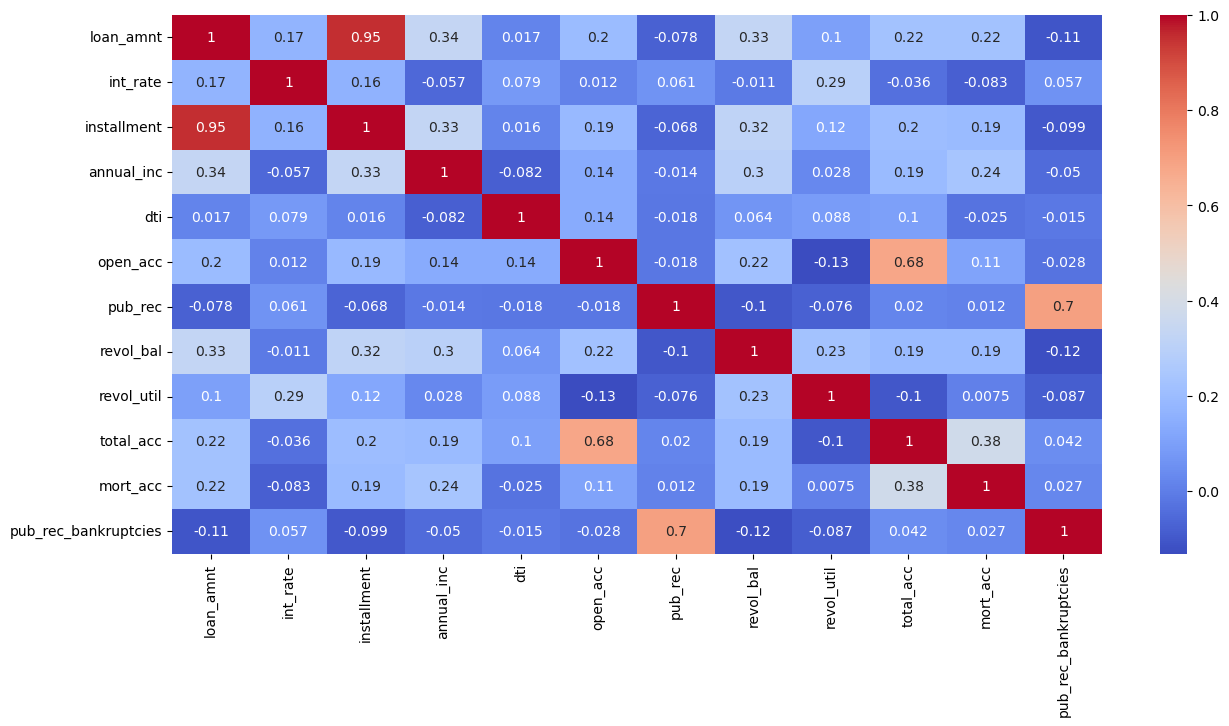

In [ ]:
corr = data.select_dtypes(include=["number"]).corr()

# corr=data.corr()
plt.figure(figsize = (15,7))
sns.heatmap(corr, annot= True , cmap="coolwarm")

*Larger loans were more likely to default.*

*Higher credit scores indicate lower risk.*

To combat this from a business perspective, a stricter eligibility criteria for high loan amounts could be implemented or a tiered interest rate could also be implemented to balance risks.

(Tiered interest rates can be simply understood as varying levels of interest rates for varying levels of borrowers. For example, low-risk borrowers could have an interest rate of 5% and consequently high risk borrowers could have an interest rate of 20% with mid risk borrowers facing interest rates between the range of the latter two borrowers)

<Axes: xlabel='loan_amnt', ylabel='loan_status'>

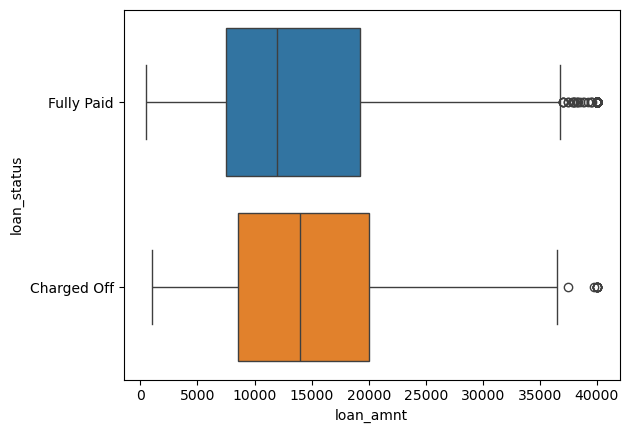

In [ ]:
sns.boxplot(y = data["loan_status"], x = data["loan_amnt"], hue = data["loan_status"])

In [ ]:
data1 = data[data["loan_amnt"] <= 37000]

the value was chosen as 37000 as the observed outlier begins from 37000.


In [ ]:
data1.shape

(395831, 27)

In [ ]:
data.groupby("loan_status")["installment"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,452.703110,249.096609,21.62,274.86,399.06,585.67,1527.00
Fully Paid,318357.0,426.761866,250.861622,16.08,244.46,369.51,562.89,1533.81


<Axes: xlabel='grade', ylabel='count'>

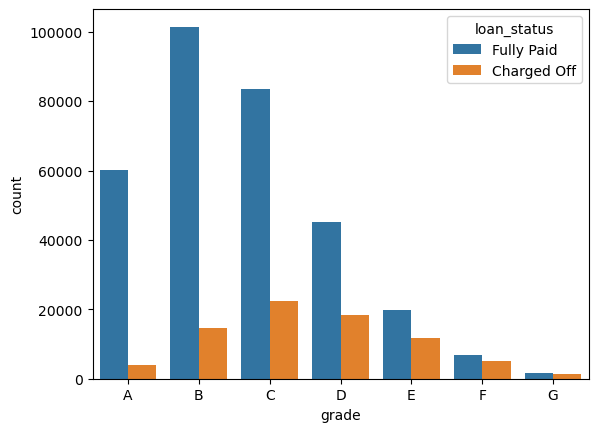

In [ ]:
sorted_grade = sorted(data["grade"].unique())
sns.countplot(x="grade", data= data, hue="loan_status", order= sorted_grade)

In [ ]:
data["grade"].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [ ]:
data['Loan_Repayed'] = data['loan_status'].map({"Charged Off": 0, "Fully Paid": 1})

"Charged Off" is mapped to 0 → Loan was not repaid (defaulted)

"Fully Paid" is mapped to 1 → Loan was successfully repaid

We do this in order to make easier the problem of dealing with multiple loan statuses and instead dealing with whether the loan will be repaid or not.

In [ ]:
data[["Loan_Repayed","loan_status"]]

,Loan_Repayed,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [ ]:
data.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
Loan_Repayed            0.000000
dtype: float64

In [ ]:
data["emp_title"].nunique()

173105

In [ ]:
data = data.drop("emp_title", axis=1)

*emp_title (Job Title)* contains 173,105 unique job titles, indicating high variability. Since this feature has too many unique values, it may not be useful for predictive modeling.

Hence the column is dropped due to the number of unique values which creates high cardinality making it difficult for the ML models to use effectively


In [ ]:
data["emp_length"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 396030 entries, 0 to 396029
Series name: emp_length
Non-Null Count   Dtype 
--------------   ----- 
377729 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB


In [ ]:
sorted(data["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
sorted_emp_length = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

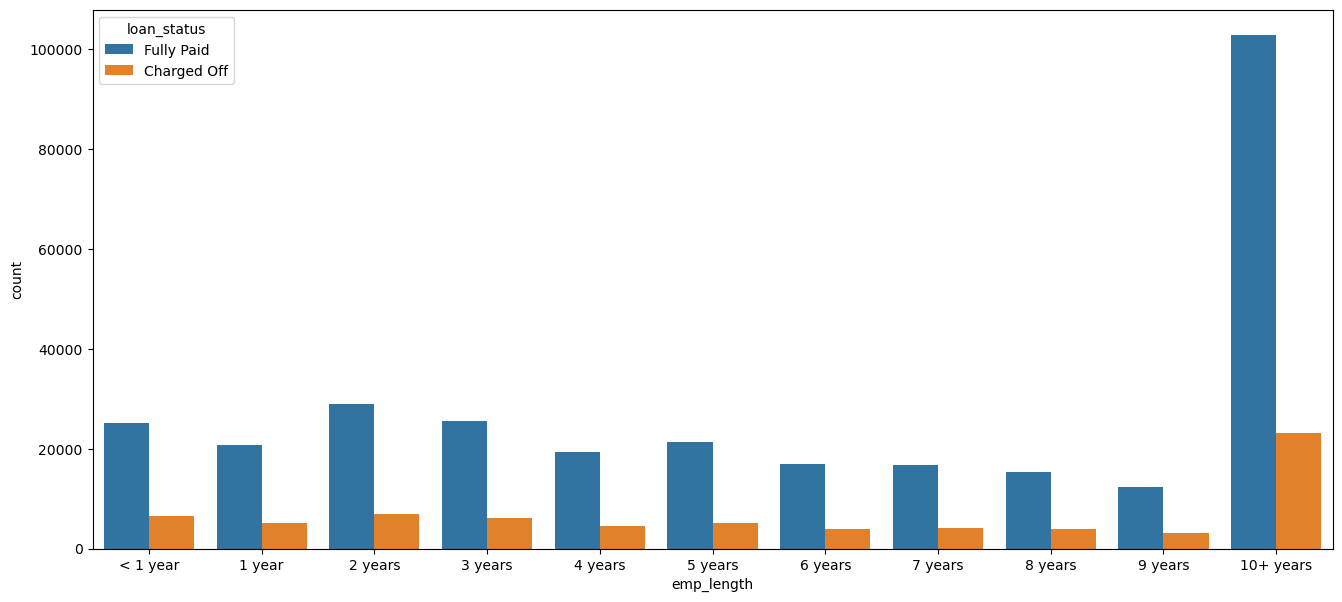

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(x= "emp_length", hue = "loan_status",data= data, order = sorted_emp_length)

In [ ]:
emp_co = data[data["loan_status"]=="Charged Off"].groupby("emp_length").count()["loan_status"]
emp_fp = data[data["loan_status"]=="Fully Paid"].groupby("emp_length").count()["loan_status"]
employee_ratio = emp_co/(emp_co + emp_fp)

<Axes: xlabel='emp_length'>

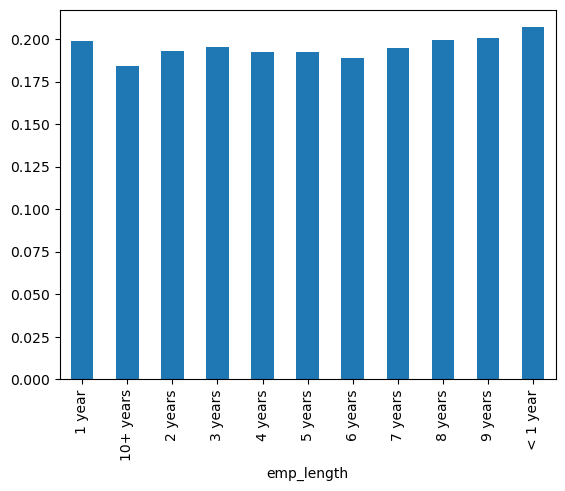

In [ ]:
employee_ratio.plot(kind="bar")

In [ ]:
data = data.drop("emp_length", axis=1)

In [ ]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
Loan_Repayed                0
dtype: int64

In [ ]:
data["title"].nunique()

48816

In [ ]:
data = data.drop("title", axis=1)

The *title* column contains 48,816 unique values, indicating high cardinality, this suggests that borrowers entered custom loan titles, likely describing the purpose of the loan. For example, "Debt Consolidation Loan", "Home Improvement Loan". This is a problem because high uniqueness means that this column may not be useful for modeling, as each title is mostly unique.


In [ ]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
Loan_Repayed                0
dtype: int64

In [ ]:
data['revol_util'].dtypes

dtype('float64')

In [ ]:
data["revol_util"] = data["revol_util"].fillna(value=mean)


In [ ]:
data["pub_rec_bankruptcies"] = data["pub_rec_bankruptcies"].fillna(mean)


In [ ]:
data["total_acc"].value_counts()

total_acc
21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
         ...  
110.0        1
129.0        1
135.0        1
104.0        1
103.0        1
Name: count, Length: 118, dtype: int64

In [ ]:
#total_acc_avg = data.groupby("total_acc").mean()["mort_acc"]
#total_acc_avg

print(data.dtypes)
data["mort_acc"] = pd.to_numeric(data["mort_acc"], errors='coerce')
print(data["mort_acc"].unique())
total_acc_avg = data.groupby("total_acc")["mort_acc"].mean()
print(total_acc_avg)


loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
Loan_Repayed              int64
dtype: object
[ 0.  3.  1.  4.  2.  6.  5. nan 10.  7. 12. 11.  8.  9. 13. 14. 22. 34.
 15. 25. 19. 16. 17. 32. 18. 24. 21. 20. 31. 28. 30. 23. 26. 27.]
total_acc
2.0      0.000000
3.0      0.052023
4

In [ ]:
def fill_in_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return(mort_acc)

In [ ]:
data["mort_acc"] = data.apply(lambda x: fill_in_mort_acc(x["total_acc"], x["mort_acc"]), axis =1)

In [ ]:
data.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
data["earliest_cr_line"].value_counts()

earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [ ]:
data["term"] = data["term"].str[:3]
data["term"].value_counts()
data =data.astype({"term":"int"})

In [ ]:
data["term"].dtypes

dtype('int32')

In [ ]:
data.dtypes

loan_amnt               float64
term                      int32
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
Loan_Repayed              int64
dtype: object

In [ ]:
data["home_ownership"].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [ ]:
data["grade"].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [ ]:
data = data.drop("grade",axis =1)

Instead of using a high-level classification *(grade)*, we keep *sub_grade* since it provides more granular insights about loan quality.


In [ ]:
dummy = pd.get_dummies(data["sub_grade"] , drop_first = True)

In [ ]:
data = pd.concat([data.drop("sub_grade", axis = 1), dummy], axis = 1)

In [ ]:
dummy = pd.get_dummies(data[["verification_status","application_type","initial_list_status","purpose"]] , drop_first=True)

In [ ]:
data = pd.concat([data.drop(["verification_status","application_type","initial_list_status","purpose"], axis = 1), dummy], axis = 1)

In [ ]:
data = data.drop("loan_status",axis =1)
data.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,dti,earliest_cr_line,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,26.24,Jun-1990,16.0,...,False,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,22.05,Jul-2004,17.0,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,12.79,Aug-2007,13.0,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,2.60,Sep-2006,6.0,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,33.95,Mar-1999,13.0,...,False,False,False,False,False,False,False,False,False,False


*loan_status* has already been converted into a binary target variable *(Loan_Repayed)*

In [ ]:
data["home_ownership"]=data["home_ownership"].replace(["NONE","ANY"], "OTHER")

In [ ]:
dummy = pd.get_dummies(data["home_ownership"] , drop_first = True)
data = pd.concat([data.drop("home_ownership", axis = 1), dummy], axis = 1)

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,26.24,Jun-1990,16.0,0.0,...,False,False,False,False,False,True,False,False,False,True
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,22.05,Jul-2004,17.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,12.79,Aug-2007,13.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,2.60,Sep-2006,6.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,33.95,Mar-1999,13.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data["zip_code"]= data["address"].apply(lambda address: address[-5:])
data = data.drop("address", axis= 1)

In [ ]:
dummy = pd.get_dummies(data["zip_code"] , drop_first = True)
data = pd.concat([data.drop("zip_code", axis = 1), dummy], axis = 1)

In [ ]:
data = data.drop("issue_d", axis= 1)

It is not useful for predicting loan repayment because it does not provide direct information about the borrower's creditworthiness.

Keeping *issue_d* could introduce data leakage, meaning that future data (such as knowing when a loan was issued) could unfairly influence predictions.

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,26.24,Jun-1990,16.0,0.0,36369.0,...,True,False,False,True,False,False,False,False,False,False
1,8000.0,36,11.99,265.68,65000.0,22.05,Jul-2004,17.0,0.0,20131.0,...,False,True,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,12.79,Aug-2007,13.0,0.0,11987.0,...,True,True,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,54000.0,2.60,Sep-2006,6.0,0.0,5472.0,...,True,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,55000.0,33.95,Mar-1999,13.0,0.0,24584.0,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
data["earliest_cr_line"]= data["earliest_cr_line"].apply(lambda year: int(year[-4:]))

In [ ]:
data.select_dtypes(["object"]).columns

Index([], dtype='object')

In [ ]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'Loan_Repayed', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650'

In [ ]:
a = data.corr()["Loan_Repayed"].reset_index()

In [ ]:
a

,index,Loan_Repayed
0,loan_amnt,-0.059836
1,term,-0.173246
2,int_rate,-0.247758
3,installment,-0.041082
4,annual_inc,0.053432
...,...,...
74,30723,0.001260
75,48052,-0.004110
76,70466,0.000515
77,86630,-0.341889


In [ ]:
a[a["Loan_Repayed"]>0.15]

,index,Loan_Repayed
14,Loan_Repayed,1.000000
70,05113,0.177743
73,29597,0.177895


In [ ]:
a[a["Loan_Repayed"]<(-0.15)]

,index,Loan_Repayed
1,term,-0.173246
2,int_rate,-0.247758
71,11650,-0.345792
77,86630,-0.341889
78,93700,-0.344601


In [ ]:
X = data[["05113","29597","term","int_rate","11650","86630","93700"]]
Y = data["Loan_Repayed"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y ,  test_size=0.20)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)
#Y_train = scaler.fit_transform(Y_train)
#Y_test = scaler.fit_transform(Y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

# ***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
model= LogisticRegression()
model.fit(X_train,Y_train)
ms = model.score(X_test,Y_test)
print(f"Model Score : {ms}")

Model Score : 0.8877862788172614


In [ ]:
predict = model.predict(X_test)

In [ ]:
f1 = f1_score(Y_test,predict, average = "micro")
print(f"F1 Score : {f1}")

F1 Score : 0.8877862788172614


# ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1= DecisionTreeClassifier()
model1.fit(X_train,Y_train)
ms1 = model1.score(X_test,Y_test)
print(f"Model Score : {ms1}")

Model Score : 0.8878872812665707


In [ ]:
predict1 = model1.predict(X_test)
f1_1 = f1_score(Y_test,predict1, average = "micro")
print(f"F1 Score : {f1_1}")

F1 Score : 0.8878872812665707


In [ ]:
conf_matrix=confusion_matrix(Y_test,predict1)
conf_matrix

array([[ 6712,  8797],
       [   83, 63614]], dtype=int64)

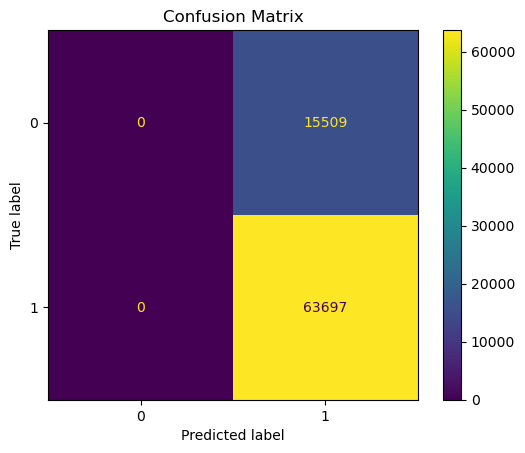

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title("Confusion Matrix")
plt.show()


Based on the confusion matrix, we can make the following observations;


1.   True Positives (63,614) are very high.
2.   False Negatives (83) are very low (*meaning very few actual defaulters were misclassified*).
3. False Positives (8,797) are quite high (*many non-defaulters were wrongly classified as defaulters.*)

This could lead to unnecessary loan rejections, affecting customers who actually would have repaid their loans.





In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2= RandomForestClassifier()
model2.fit(X_train,Y_train)
ms2 = model2.score(X_test,Y_test)
print(f"Model Score : {ms2}")

Model Score : 0.8880766608590258


In [ ]:
predict2 = model2.predict(X_test)
f1_2 = f1_score(Y_test,predict2, average = "micro")
print("f1 score for Random Forest Classifier:", f1_2)

f1 score for Random Forest Classifier: 0.8880766608590258


In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
print("f1 score for Logistic Regression:",f1)
print("f1 score for Decision Tree Classifier:",f1_1)
print("f1 score for Random Forest Classifier:", f1_2)

f1 score for Logistic Regression: 0.8877862788172614
f1 score for Decision Tree Classifier: 0.8878872812665707
f1 score for Random Forest Classifier: 0.8880766608590258


All three models perform similarly in balancing precision and recall.Random Forest performs slightly better (0.8881), suggesting better generalization and slightly improved classification of loan defaults. This aids in our assignment as random forest acts as a strong classifier and identifies which features influence default risk the most.

In [ ]:
print("model score for Logistic Regression:", ms)
print("model score for Decision Tree Classifier:",ms1)
print("model score for Random Forest Classifier:", ms2)

model score for Logistic Regression: 0.8877862788172614
model score for Decision Tree Classifier: 0.8878872812665707
model score for Random Forest Classifier: 0.8880766608590258


all three models, LR, DT and RF achieved similar scores of 88.8% implying that historical loan data is a strong predictor of future loan repayment.

It is to be noted that random forest outperforms logistic and decision tree scores, suggesting that loan repayment patterns are not purely linear (which would favor Logistic Regression) and benefit from ensemble learning.

# ***kNN Classifier***

In [ ]:
# Training the KNN classifier with k=5 (you can tune this)
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train_scaled, Y_train)

# Predictions
Y_pred = knn.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.8042
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15509
           1       0.80      1.00      0.89     63697

    accuracy                           0.80     79206
   macro avg       0.40      0.50      0.45     79206
weighted avg       0.65      0.80      0.72     79206



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


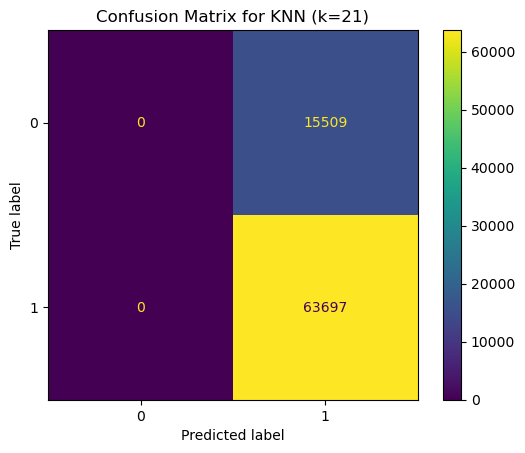

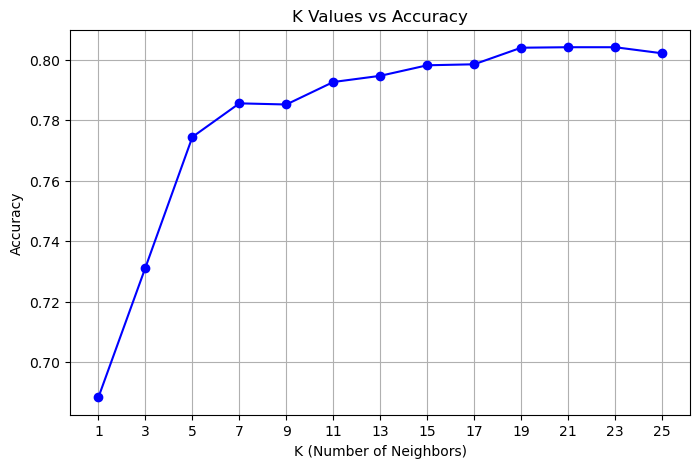

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Confusion Matrix plot
conf_matrix = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title("Confusion Matrix for KNN (k=21)")
plt.show()

# Accuracy plot for varying k values
k_values = list(range(1, 26, 2))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    Y_pred_k = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(Y_test, Y_pred_k))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', color='blue')
plt.title("K Values vs Accuracy")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


Recall for defaulters (Class 1) is 100%, meaning every actual defaulter is correctly identified.
Precision for Class 1 is 80%, meaning some false positives exist.

This is because, dataset has many more defaulters (63,697) than non-defaulters (15,509) and kNN being a distance based metric naturally assigns to the majority class based on distance.

# ***XGBoost***

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB 2.9 MB/s eta 0:00:44
   ---------------------------------------- 0.7/124.9 MB 6.4 MB/s eta 0:00:20
   ---------------------------------------- 1.3/124.9 MB 7.7 MB/s eta 0:00:16
    --------------------------------------- 1.9/124.9 MB 8.8 MB/s eta 0:00:14
    --------------------------------------- 2.7/124.9 MB 9.9 MB/s eta 0:00:13
   - -------------------------------------- 3.2/124.9 MB 10.2 MB/s eta 0:00:12
   - -------------------------------------- 3.9/124.9 MB 10.7 MB/s eta 0:00:12
   - -------------------------------------- 4.4/124.9 MB 10.8 MB/s eta 0:00:12
   - -------------------------------------- 5.0/124.9 MB 11.1 MB/s eta 0:00:11
   - -------------------------------------- 5.6/124.9 MB 11.2 MB/s eta 0:00:11
   - -------------------------------------- 6.2/124.9 MB 11.3 MB/s eta 0:

C:\Users\hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:21:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8042
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15509
           1       0.80      1.00      0.89     63697

    accuracy                           0.80     79206
   macro avg       0.40      0.50      0.45     79206
weighted avg       0.65      0.80      0.72     79206



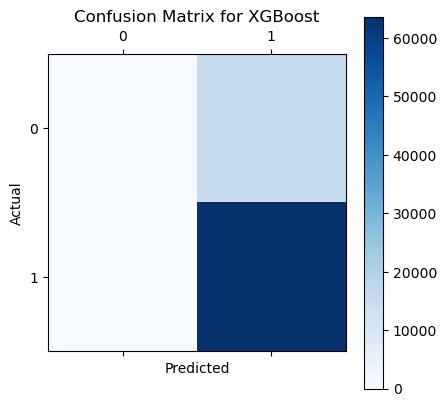

In [ ]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb_clf.fit(X_train_scaled, Y_train)

# Predictions
Y_pred = xgb_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(Y_test, Y_pred))

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XGBoost model was trained on the dataset for a binary classification problem (loan repayment vs. default). While it achieved an accuracy of 80.42%, a deeper analysis of the precision, recall, and F1-score reveals that the model struggles with class imbalance and does not perform well in predicting non-defaulters (Class 0). That is, model correctly identifies all defaulters (Class 1) with 100% recall, yet it fails to classify non-defaulters. happens due to class imbalance, where the dataset has significantly more defaulters than non-defaulters, causing the model to favor the majority class (default) and ignore the minority class (non-default).

# ***Conclusion***

The goal of this project was to develop a machine learning model that accurately predicts whether a borrower will repay a loan or default, thereby helping financial institutions make data-driven lending decisions.

Random Forest Classifier performed the best, with he highest F1-score (0.8881), indicating strong classification performance, and Showed better generalization in predicting both defaulters and non-defaulters. Whereas, (KNN) was the worst model having predicted nearly all loans as defaults, making it useless for lending decisions and completely failed to identify low-risk borrowers, contradicting the project’s aim.


It must be noted that there were some challenges faced in our assignment;

### *Challenges*

Most models struggled to predict repaid loans (Class 0) due to an overwhelming majority of defaulters in the dataset. (However SMOTE (Synthetic Minority Over-sampling Technique)could be used to balance the dataset.)

kNN and XGBoost models favored defaulters, leading to a high rate of false positives (wrongly predicting non-defaulters as defaulters).

### ***Recommendation***

The best model for this task is Random Forest. Moreover, the analysis showed loan amount and credit score were key predictors, supporting the idea that larger loans had a higher risk of default. Deploying the final model in financial institutions can help reduce lending risks and improve loan approval accuracy beyond traditional methods.

We also once more recommend implementing tiered interest rates based on risk scores.






